In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [35]:
df = pd.read_csv('/content/avocado_ripeness_dataset.csv')
df

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking
...,...,...,...,...,...,...,...,...,...
245,94.1,83,80,58,dark green,72,254,134,hard
246,21.6,17,36,19,black,47,182,240,firm-ripe
247,14.0,4,40,17,black,37,188,274,ripe
248,61.5,63,87,75,green,65,261,162,pre-conditioned


In [36]:
# 1.	Загрузка данных, вывод информации (.info(), .describe()).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brightness      250 non-null    int64  
 4   color_category  250 non-null    object 
 5   sound_db        250 non-null    int64  
 6   weight_g        250 non-null    int64  
 7   size_cm3        250 non-null    int64  
 8   ripeness        250 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 17.7+ KB


In [37]:
df.describe()

,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3
count,250.000000,250.00000,250.000000,250.00000,250.000000,250.000000,250.000000
mean,50.618400,125.94400,64.356000,45.07200,58.016000,220.188000,208.644000
std,27.277678,117.13767,17.377144,19.11629,13.838126,34.405225,55.940564
min,10.300000,1.00000,30.000000,10.00000,30.000000,152.000000,100.000000
25%,25.750000,25.25000,51.250000,31.00000,47.250000,193.250000,155.250000
50%,48.950000,77.00000,65.000000,46.00000,60.000000,220.000000,218.000000
75%,74.050000,278.75000,76.750000,58.00000,68.000000,245.000000,260.500000
max,98.800000,329.00000,99.000000,78.00000,79.000000,299.000000,299.000000


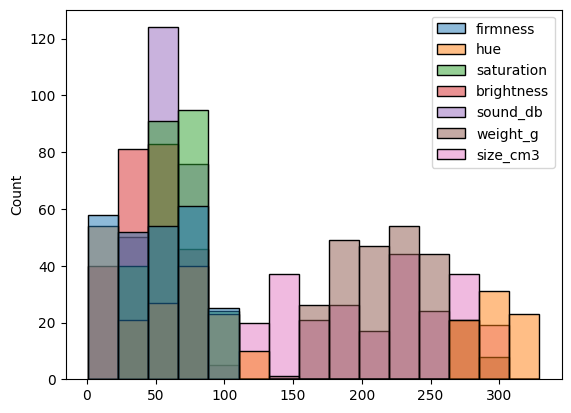

In [41]:

#2.Анализ распределения каждого признака (гистограммы, boxplots).
sns.histplot(data=df)
plt.show()

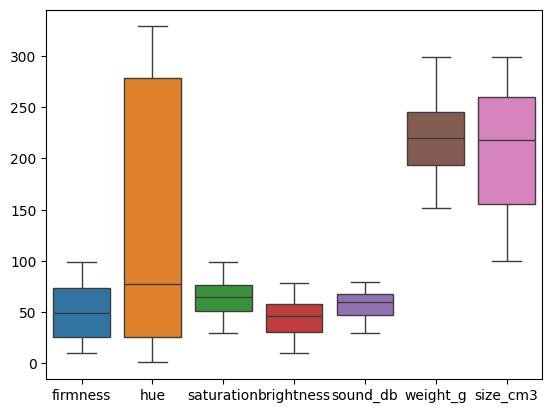

In [42]:

sns.boxplot(data=df)
plt.show()

In [44]:
#3.Анализ зависимости признаков от ripeness:
#firmness, weight_g, size_cm3 vs ripeness
#hue, saturation, brightness vs color_category vs ripeness
df[['firmness','weight_g','size_cm3','ripeness']].corr()

ValueError: could not convert string to float: 'ripe'

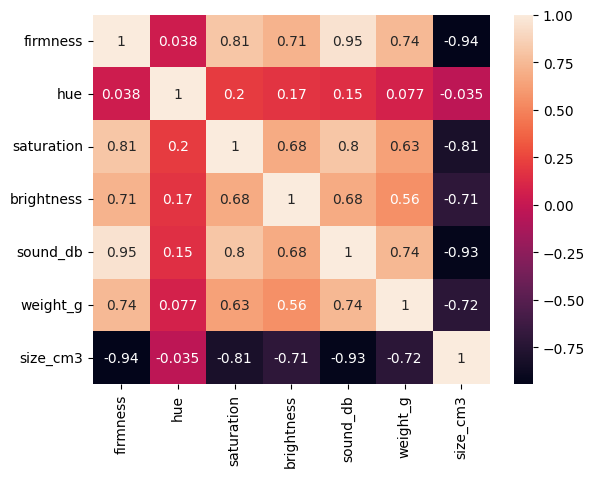

In [45]:

#4.Анализ корреляций между числовыми признаками (heatmap, pairplot).
sns.heatmap(data=df.select_dtypes(exclude=('object')).corr(), annot=True)
plt.show()

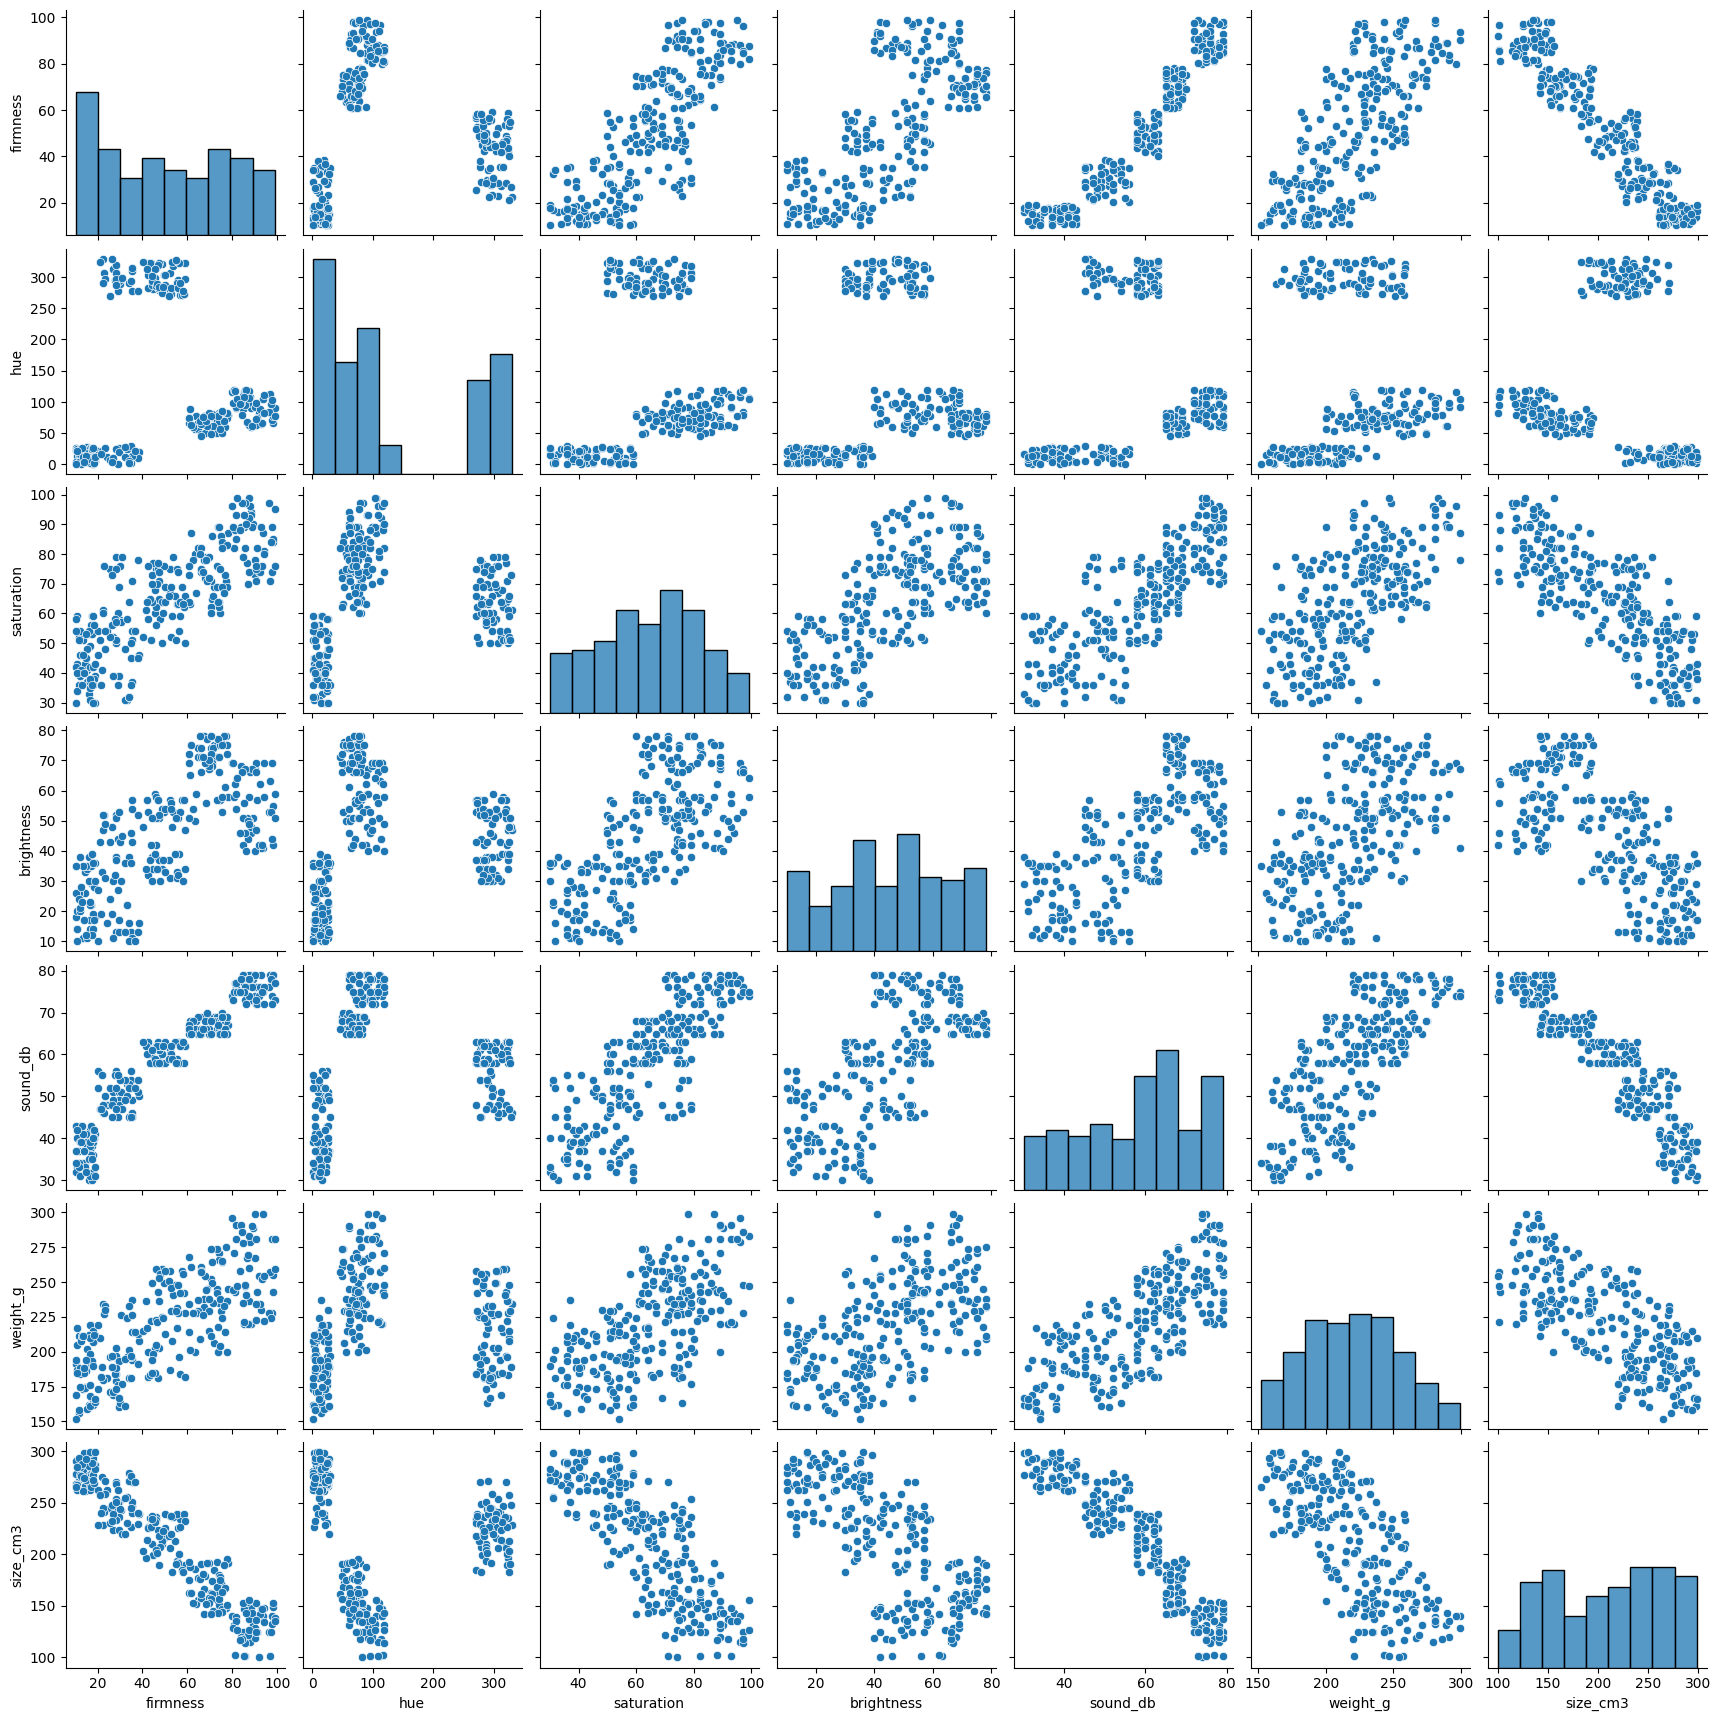

In [46]:
sns.pairplot(data=df)
plt.show()

In [47]:
#5.Проверка и обработка пропусков, выбросов.
df.isnull().sum()

,0
firmness,0
hue,0
saturation,0
brightness,0
color_category,0
sound_db,0
weight_g,0
size_cm3,0
ripeness,0


In [48]:
ripeness_map = {'hard': 0, 'pre-conditioned': 1, 'breaking': 2, 'firm-ripe': 3, 'ripe': 4}
df['ripeness'] = df['ripeness'].map(ripeness_map)

In [49]:
#6.Кодирование категориальных признаков (color_category) — OneHot или Label Encoding.
df = pd.get_dummies(df, columns=['color_category'], drop_first=True, dtype=int)


In [50]:
#7.Масштабирование числовых признаков (MinMaxScaler, StandardScaler).
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns='ripeness'))

In [51]:
#8.Формирование X и y (разделение признаков и целевой переменной).

x = scaled_data
y = df['ripeness']

In [52]:
#9.Разделение на обучающую и тестовую выборки (например, 80/20).

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Моделирование

In [54]:
#10.Обучение нескольких моделей классификации: Logistic Regression (базовая модель)

log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [56]:
y_pred = log_model.predict(x_test)

In [58]:
#Accuracy
accuracy_score(y_pred, y_test)

1.0

In [67]:
# precision_score
precision_score(y_pred, y_test, average='weighted')

1.0

In [68]:
# recall_score
recall_score(y_pred, y_test, average='weighted')

1.0

In [70]:
# f1_score
f1_score(y_pred, y_test, average='weighted')

1.0

In [71]:
# classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [60]:
import joblib

joblib.dump(log_model, 'log_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [61]:
df

,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3,ripeness,color_category_dark green,color_category_green,color_category_purple
0,14.5,19,40,26,34,175,261,4,0,0,0
1,71.7,53,69,75,69,206,185,1,0,1,0
2,88.5,60,94,46,79,220,143,0,1,0,0
3,93.8,105,87,41,75,299,140,0,1,0,0
4,42.5,303,58,32,63,200,227,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
245,94.1,83,80,58,72,254,134,0,1,0,0
246,21.6,17,36,19,47,182,240,3,0,0,0
247,14.0,4,40,17,37,188,274,4,0,0,0
248,61.5,63,87,75,65,261,162,1,0,1,0
